In [28]:
import numpy as np
import pandas as pd
from bbai.glm import BayesianRidgeRegression
from sklearn.linear_model import BayesianRidge

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read in the data
dataset = pd.read_csv('../data/full_data2.csv', usecols=['Lap_Number', 'Subject', 'Gaze.x.', 'Gaze.y.', 'Ang_Pos'], sep=';')
dataset = dataset.dropna()

In [6]:
train_set = dataset[dataset.Lap_Number==1]
train_set = train_set.iloc[::10, :]

train_set.shape

(9585, 5)

In [19]:
test_set = dataset[dataset.Lap_Number==0]
test_set = test_set.iloc[::10, :]

test_set.shape

(9891, 5)

In [20]:
## Normalizing the data
train_set.loc[:,'Gaze.x.'] = train_set.loc[:,'Gaze.x.'] / 2650 - 0.5
train_set.loc[:,'Gaze.y.'] = train_set.loc[:,'Gaze.y.'] / 1080 - 0.5

test_set.loc[:,'Gaze.x.'] = test_set.loc[:,'Gaze.x.'] / 2650 - 0.5
test_set.loc[:,'Gaze.y.'] = test_set.loc[:,'Gaze.y.'] / 1080 - 0.5

In [21]:
train_set.iloc[:,2:4]

,Gaze.x.,Gaze.y.
6974,-0.500020,-0.500084
6984,-0.500021,-0.500084
6994,-0.500025,-0.500084
7004,-0.500029,-0.500080
7014,-0.500028,-0.500079
...,...,...
194710,-0.499946,-0.500115
194720,-0.499834,-0.500285
194730,-0.500002,-0.500080
194740,-0.500002,-0.500080


In [22]:
model_bay = BayesianRidgeRegression(fit_intercept=True)
model_bay.fit(train_set.iloc[:,4:5], train_set.iloc[:,2:4].to_numpy())

In [25]:
model_bay.weight_mean_vector_, model_bay.noise_variance_mean_

(array([4.07193723e-06]), 5.990776003753847e-09)

In [53]:
gaze_x = train_set['Gaze.x.'].to_numpy().reshape(-1, 1)
gaze_y = train_set['Gaze.y.'].to_numpy().reshape(-1, 1)
angs = train_set['Ang_Pos'].to_numpy().reshape(-1, 1)

In [68]:
clf = BayesianRidge(compute_score=True)
clf.fit(angs, gaze_x)

/home/geraldwong/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(compute_score=True)

In [70]:
clf2 = BayesianRidge(compute_score=True)
clf2.fit(angs, gaze_y)

/home/geraldwong/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(compute_score=True)

In [69]:
clf.coef_

array([-1.22279637e-06])

In [71]:
clf2.coef_

array([-2.0959866e-07])

<Axes: xlabel='Gaze.x.', ylabel='Count'>

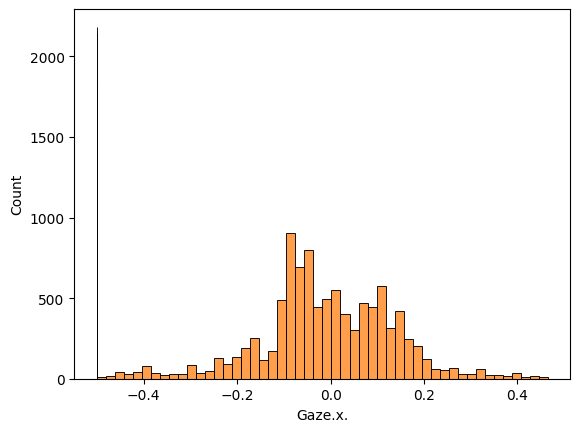

In [61]:
pred = clf.predict(test_set['Ang_Pos'].to_numpy().reshape(-1, 1))
sns.histplot(pred, bins=50)
sns.histplot(test_set['Gaze.x.'], bins=50)

In [16]:
#def compute_prediction_error_variance(K, w_true, w):
#    delta = w - w_true
#    noise_variance = 1.0
#    return noise_variance + np.dot(delta, np.dot(K, delta))

In [17]:
#err_variance_bay = compute_prediction_error_variance(K, w_true, model_bay.weight_mean_vector_)

NameError: name 'K' is not defined